In [1]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip "glove.6B.zip"

--2020-06-09 14:25:06--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-06-09 14:25:07--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-06-09 14:25:07--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [3]:
!unzip "/content/drive/My Drive/429163_816060_bundle_archive.zip"

Archive:  /content/drive/My Drive/429163_816060_bundle_archive.zip
  inflating: Test.csv                
  inflating: Train.csv               
  inflating: Valid.csv               


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Embedding,Flatten,LSTM,Dense,GlobalMaxPool1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import *

In [7]:
train_path = "Train.csv"
test_path = "Test.csv"
valid_path = "Valid.csv"

train_df = pd.read_csv(train_path)
valid_df = pd.read_csv(valid_path)

print(train_df.head())
print(valid_df.head())

                                                text  label
0  I grew up (b. 1965) watching and loving the Th...      0
1  When I put this movie in my DVD player, and sa...      0
2  Why do people who do not know what a particula...      0
3  Even though I have great interest in Biblical ...      0
4  Im a die hard Dads Army fan and nothing will e...      1
                                                text  label
0  It's been about 14 years since Sharon Stone aw...      0
1  someone needed to make a car payment... this i...      0
2  The Guidelines state that a comment must conta...      0
3  This movie is a muddled mish-mash of clichés f...      0
4  Before Stan Laurel became the smaller half of ...      0


In [0]:
x_train,y_train = train_df['text'].values, train_df['label'].values
x_val,y_val = valid_df['text'].values, valid_df['label'].values

In [0]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(list(x_train))

x_train = word_tokenizer.texts_to_sequences(x_train)
x_val = word_tokenizer.texts_to_sequences(x_val)

In [14]:
size_of_vocabulary=len(word_tokenizer.word_index) + 1 #+1 for padding
print(size_of_vocabulary)

112204


In [0]:
x_tr_seq  = pad_sequences(x_train, maxlen=100)
x_val_seq = pad_sequences(x_val, maxlen=100)

In [31]:
model = Sequential()
model.add(Embedding(size_of_vocabulary,300,input_length=100,trainable=True))
model.add(LSTM(128,return_sequences=True,activation='relu',dropout=0.1))
model.add(GlobalMaxPool1D())
model.add(Dense(64,activation="relu"))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',metrics=['acc'],loss='binary_crossentropy')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 300)          33661200  
_________________________________________________________________
lstm_3 (LSTM)                (None, 100, 128)          219648    
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 33,889,169
Trainable params: 33,889,169
Non-trainable params: 0
_________________________________________________________________


In [0]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=3)  
mc=ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', save_best_only=True,verbose=1)

In [33]:
history = model.fit(x_tr_seq,y_train,epochs=10,validation_data=(x_val_seq,y_val),callbacks=[es,mc],batch_size=128)

Epoch 1/10
313/313 [==============================] - ETA: 0s - loss: 1794734292992.0000 - acc: 0.7829
Epoch 00001: val_acc improved from -inf to 0.83480, saving model to best_model.h5
313/313 [==============================] - 190s 608ms/step - loss: 1794734292992.0000 - acc: 0.7829 - val_loss: 0.3957 - val_acc: 0.8348
Epoch 2/10
313/313 [==============================] - ETA: 0s - loss: 12032.4004 - acc: 0.8768
Epoch 00002: val_acc improved from 0.83480 to 0.85260, saving model to best_model.h5
313/313 [==============================] - 191s 611ms/step - loss: 12032.4004 - acc: 0.8768 - val_loss: 1297.1008 - val_acc: 0.8526
Epoch 3/10
313/313 [==============================] - ETA: 0s - loss: 0.2212 - acc: 0.9264
Epoch 00003: val_acc did not improve from 0.85260
313/313 [==============================] - 191s 610ms/step - loss: 0.2212 - acc: 0.9264 - val_loss: 0.3694 - val_acc: 0.8496
Epoch 4/10
313/313 [==============================] - ETA: 0s - loss: 511.7755 - acc: 0.9607
Epoch 0

In [35]:
_,val_acc = model.evaluate(x_val_seq,y_val, batch_size=128)
print(val_acc)

40/40 [==============================] - 1s 29ms/step - loss: 0.5007 - acc: 0.8286
0.8285999894142151


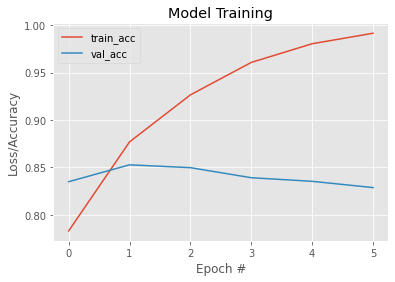

In [39]:
def plot_train(hist):
  plt.style.use("ggplot")
  plt.figure()
  # plt.plot(hist.history["loss"], label="train_loss")
  # plt.plot(hist.history["val_loss"], label="val_loss")
  plt.plot(hist.history["acc"], label="train_acc")
  plt.plot(hist.history["val_acc"], label="val_acc")
  plt.title("Model Training")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.legend()
  plt.savefig("epochs.png")

plot_train(history)

In [40]:
embeddings_dict = dict()

emb = open("glove.6B.300d.txt")
for line in emb:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_dict[word] = coefs
emb.close()
print(f"loaded {len(embeddings_dict)} word vectors")

loaded 400000 word vectors


In [0]:
embedding_matrix = np.zeros((size_of_vocabulary,300))
for word,i in word_tokenizer.word_index.items():
  embedding_vector = embeddings_dict.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [46]:
model = Sequential()
model.add(Embedding(size_of_vocabulary,300,input_length=100,trainable=False,weights=[embedding_matrix]))
model.add(LSTM(128,return_sequences=True,activation='relu',dropout=0.1))
model.add(GlobalMaxPool1D())
model.add(Dense(64,activation="relu"))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',metrics=['acc'],loss='binary_crossentropy')
model.summary()
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=3)  
mc=ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', save_best_only=True,verbose=1)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 300)          33661200  
_________________________________________________________________
lstm_5 (LSTM)                (None, 100, 128)          219648    
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 65        
Total params: 33,889,169
Trainable params: 227,969
Non-trainable params: 33,661,200
_________________________________________________________________


In [47]:
history = model.fit(x_tr_seq,y_train,epochs=10,validation_data=(x_val_seq,y_val),callbacks=[es,mc],batch_size=128)

Epoch 1/10
313/313 [==============================] - ETA: 0s - loss: 0.7625 - acc: 0.7398
Epoch 00001: val_acc improved from -inf to 0.78620, saving model to best_model.h5
313/313 [==============================] - 88s 282ms/step - loss: 0.7625 - acc: 0.7398 - val_loss: 0.4602 - val_acc: 0.7862
Epoch 2/10
313/313 [==============================] - ETA: 0s - loss: 0.4412 - acc: 0.7939
Epoch 00002: val_acc improved from 0.78620 to 0.81720, saving model to best_model.h5
313/313 [==============================] - 79s 253ms/step - loss: 0.4412 - acc: 0.7939 - val_loss: 0.3974 - val_acc: 0.8172
Epoch 3/10
313/313 [==============================] - ETA: 0s - loss: 0.3886 - acc: 0.8222
Epoch 00003: val_acc improved from 0.81720 to 0.83620, saving model to best_model.h5
313/313 [==============================] - 79s 251ms/step - loss: 0.3886 - acc: 0.8222 - val_loss: 0.3672 - val_acc: 0.8362
Epoch 4/10
313/313 [==============================] - ETA: 0s - loss: 0.3671 - acc: 0.8332
Epoch 00004:

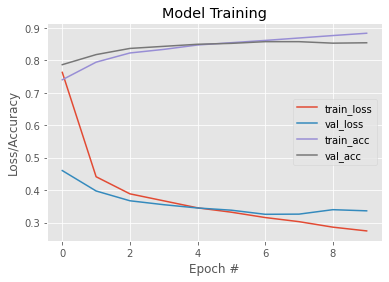

In [48]:
def plot_train(hist):
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(hist.history["loss"], label="train_loss")
  plt.plot(hist.history["val_loss"], label="val_loss")
  plt.plot(hist.history["acc"], label="train_acc")
  plt.plot(hist.history["val_acc"], label="val_acc")
  plt.title("Model Training")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.legend()
  plt.savefig("epochs.png")

plot_train(history)